In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(palette="dark")

In [2]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs     # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive               # read/write to/from SciDrive, cloud-based storage for your work
import pandas                           # package for structuring and visualizing data

# About SQL
Before you begin searching SkyServer, you should get a quick introduction what it means to search for data. SkyServer's information on all sky objects - stars, galaxies, and others - is stored in a database, a storehouse for data. A request to a database to return some information is called a query. When you ask a database for information, you must write your query in some computer language that the database can understand. SkyServer, like many other databases, uses Structured Query Language (SQL). When you write a query with SQL, the database searches for all records that meet your search criteria; in the case of SkyServer, each record is the information on a single observation of a single object in the sky.
But you have to be careful when you write a query: since the database contains hundreds of pieces of information for each of millions of objects, a poorly written query could return Gigabytes of information that won't help you at all. The best possible query will return all the information that you need, and no information that you don't need. Writing queries is an art - before you start writing, you need to think carefully about what information you need.

# The Database Structure
To know what information you need, you need to know exactly what information the database contains. The SkyServer database is divided into a series of tables. Each table contains data of a different type. For example, all data related to an object's spectrum are stored in a table called specObjAll. All data related to an object's image properties are stored in a table called photoObjAll. SkyServer contains many tables, although most of the commonly accessed data are stored in just three or four of them.
Each table contains a series of data columns. A column contains only one type of data - for example, magnitude or sky position. Each record consists of a series of columns, although some columns may be empty for some records. Some tables contain only two or three columns; some contain hundreds! Knowing exactly which table and which column contains the data you want can be a challenge.

# The Schema Browser
A tool called the Schema Browser (http://cas.sdss.org/dr16/en/help/browser/browser.aspx) allows you to study all the tables and data columns, to find where the data you want are located. The Schema Browser can be intimidating, but it is easy to use. In the left-hand column, you can either browse through various tables to find a specific column, or you can search for keywords in all the column descriptions.
To browse through the tables, click on "Tables" in the left-hand column. (Note: some tables, like "specObj," are under "Views" instead...more on that later!) A list of all tables will appear under the Tables link. Click on the name of the one that you are interested in, and a list of that table's columns will appear on the right.
To search through all the tables to find a keyword, enter the keyword in the Search box and hit Go. A list of matching table columns and descriptions will appear on the right.
There is a ton of information here. In practice, one would never need to look at more than a small fraction of it. Moreover, although you can look up stuff in the tables (such as photoObjAll and specObjAll) directly, in practice you can use their associated views, which contain only the best SDSS observation for each object.

# Views you might use include:
photoObj contains photometric (imaging) data for only the best observation of each sky object (http://cas.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+PhotoObj+V)
star contains best SDSS observations for stars only (http://cas.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+Star+V)
galaxy contains best SDSS observations for galaxies only (http://cas.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+Galaxy+V)
specObj contains spectroscopic data for only the best observation of each sky object observed by the SDSS spectrograph (http://cas.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+SpecObj+V)

# SpecPhoto
For this portion of this class, it looks like we can get away with using only one view: SpecPhoto. We will therefore avoid the slight complication of searching for information that is contained in several different tables. SpecPhoto is "a view of joined Spectro and Photo objects that have the clean spectra." So it contains things that you can measure from spectra (redshifts) and things you can measure from the images (photometry). It also contains the object type.
The schema browser webpage for SpecPhoto is here: http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+SpecPhoto+V

# A Simple Query¶
An SQL query consists of three pieces, or blocks: the select block, the from block and the where block.
The select block tells the database which columns of data you want it to return. You must separate each column name with a comma. For example, if you wanted to find the celestial coordinates right ascension (ra) and declination (dec) of an object, the select block might read

    select ra, dec

The from block specifies which table (or tables) you want to search. If you wanted to retrieve information from the specObj table, the from block would read

    from SpecPhoto

The where block allows you to search for records with certain characteristics. Your list of characteristics must be separated by the word "AND". Suppose you wanted to limit your search to a patch of sky with ra between 140 and 141 degrees and dec between 20 and 21 degrees. To search only this patch of sky, your where block would read

    where
    ra BETWEEN 140 AND 141 AND
    dec BETWEEN 20 AND 21

The database will return only those records that have an ra between 140 and 141 and a dec between 20 and 21.

## Query 1
Select all columns from the database but only keeping the top 3 rows to limit size of table. Then print out the column names in table.

In [3]:
# Find objects in the Sloan Digital Sky Survey's Data Release 16.
#
# Query the Sloan Digital Sky Serveys' Data Release 16.
# For the database schema and documentation see http://skyserver.sdss.org/dr16
#
# store the query in an object called "query"

query = (
    """
    SELECT TOP 3 *
        FROM specPhoto
    """
)

# execute the query to SDSS dr16 and store it in "test"
test = CasJobs.executeQuery(query,"dr16")
print(test.shape)
test.keys().tolist()

(3, 122)


['specObjID',
 'mjd',
 'plate',
 'tile',
 'fiberID',
 'z',
 'zErr',
 'class',
 'subClass',
 'zWarning',
 'ra',
 'dec',
 'cx',
 'cy',
 'cz',
 'htmID',
 'sciencePrimary',
 'legacyPrimary',
 'seguePrimary',
 'segue1Primary',
 'segue2Primary',
 'bossPrimary',
 'sdssPrimary',
 'survey',
 'programname',
 'legacy_target1',
 'legacy_target2',
 'special_target1',
 'special_target2',
 'segue1_target1',
 'segue1_target2',
 'segue2_target1',
 'segue2_target2',
 'boss_target1',
 'ancillary_target1',
 'ancillary_target2',
 'plateID',
 'sourceType',
 'targetObjID',
 'objID',
 'skyVersion',
 'run',
 'rerun',
 'camcol',
 'field',
 'obj',
 'mode',
 'nChild',
 'type',
 'flags',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'psfMagErr_u',
 'psfMagErr_g',
 'psfMagErr_r',
 'psfMagErr_i',
 'psfMagErr_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'fiberMagErr_u',
 'fiberMagErr_g',
 'fiberMagErr_r',
 'fiberMagErr_i',
 'fiberMagErr_z',
 'petroMag_u',
 'petro

## Query 2
Use aggregate functions such as MAX, MIN, AVG, and COUNT to return columns of important information about the data in table. 

In [4]:
query = (
    """
    SELECT MAX(ra) AS max_ra,
           MAX(dec) AS max_dec,
           MIN(ra) AS min_ra,
           MIN(dec) AS min_dec,
           AVG(ra) AS mean_ra,
           AVG(dec) AS mean_dec,
           COUNT(ra) AS count_data
        FROM specPhoto
    """
)

test = CasJobs.executeQuery(query,"dr16")
print(test.shape)
test.head(5)

(1, 7)


,max_ra,max_dec,min_ra,min_dec,mean_ra,mean_dec,count_data
0,359.99994,84.852144,0.000091,-19.702714,172.803396,24.065093,4613773


## Query 3
Can use COUNT to determine the number of rows that match a specific classification and then group them according to that classification. CASE acts like an if else block to change values in the rows. LOWER/UPPER converts strings to upper or lower case. Need the GROUP BY clause to aggregate the results of class.


In [5]:
query = (
    """
    SELECT COUNT(class) AS count_class, 
           CASE 
               WHEN class = 'QSO' THEN 'quasar'
               ELSE LOWER(class)
           END AS class
        FROM specPhoto 
    GROUP BY class
    """
)

test = CasJobs.executeQuery(query,"dr16")
print(test.shape)
test.head(5)

(3, 2)


,count_class,class
0,2787883,galaxy
1,864053,quasar
2,961837,star


## Query 4
A query to choose a subset of the columns. We can select values of ra and dec that fall in a certain range using WHERE. The ranges used are within the min and max found in the previous query.

In [6]:
query = (
    """
    SELECT z,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,class
        FROM specPhoto
    WHERE (ra BETWEEN 256.5 AND 259.7) AND 
          (dec BETWEEN 63.4 and 64.8)
    """
)

test = CasJobs.executeQuery(query,"dr16")
print(test.shape)
test.head(5)

(475, 9)


,z,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,class
0,0.152431,256.78228,63.422400,19.48079,18.27097,17.63202,17.23732,17.03432,GALAXY
1,0.152465,256.79456,63.489868,19.89245,17.86630,16.72920,16.25296,15.88060,GALAXY
2,0.000114,256.88131,63.564213,26.22519,24.70856,23.52728,20.66307,18.90411,STAR
3,0.079594,257.18246,63.499247,18.67426,17.59136,17.21099,16.90334,16.74061,GALAXY
4,0.189071,256.67234,63.461108,20.42850,18.37520,17.13770,16.64178,16.28146,GALAXY


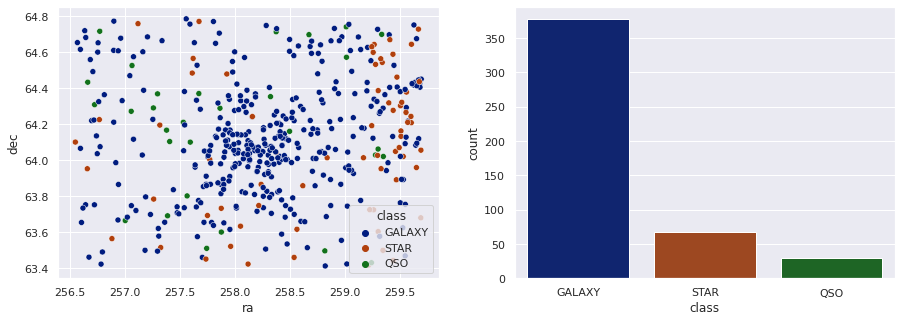

In [7]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(data=test,
                x="ra",y="dec",
                hue="class",
                ax=ax[0])
sns.countplot(data=test,
              x="class",
              ax=ax[1])
plt.show()

# Redshift distribution¶
If you just look out into space along a "square code" of 1.4 degrees on a side, what do you expect to find for the distribution of number of objects as a function of redshift?
Let's check to see if the redshift distribution of objects in our search matches this expectation. We'll use plt.hist.

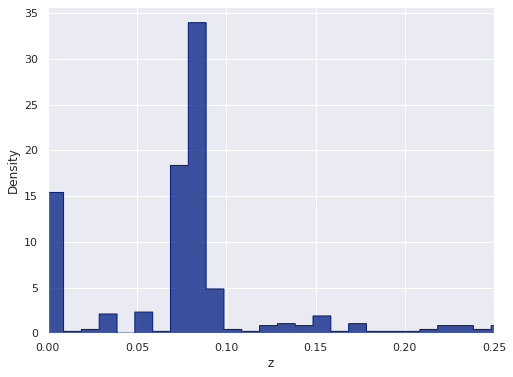

In [8]:
# first make some bins that encompass the range
bins = np.linspace(test['z'].min(),test['z'].max(),318,endpoint=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(data=test,
             x="z",
             bins=bins,
             stat="density",
             element="step")
ax.set(xlim=(0,0.25))
plt.show()

# Cluster of Galaxies
It turns out that our line of sight included a cluster of galaxies called Abell 2255.

Wikipedia definition:
    A galaxy cluster, or cluster of galaxies, is a structure that consists of anywhere from hundreds to thousands of  galaxies that are bound together by gravity with typical masses ranging from 1014–1015 solar masses. They are the largest known gravitationally bound structures in the universe and were believed to be the largest known structures in the universe until the 1980s, when superclusters were discovered.
    
The bottom line is that even though the Universe started out extremely smooth (e.g., fluctuations in the Cosmic Microwave Background temperature are one part in 14,000), it became clumpier and clumpier as it evolved. The most obvious evidence for the clumpiness are galaxies themselves, but those galaxies are frequently organized in groups or clusters of galaxies. To seen an example of this: https://ned.ipac.caltech.edu/level5/March12/Coil/Figures/figure3.jpg
We will spend some time at the end of the course discussing how this structure came about.
It is important to note that this procedure is only showing the galaxies from which spectra were obtained. Abell 2255 is a rich cluster of galaxies, which means that there are 1000s of galaxies in the cluster. SDSS does not obtain spectra of all of them because there is a limit to how closely the fibers can be packed. However, a sufficient sample is obtained to get an idea of the properties of the cluster.
It turns out that a plot of the RA and DEC of our selection reveals the cluster of galaxies as a central concentration.

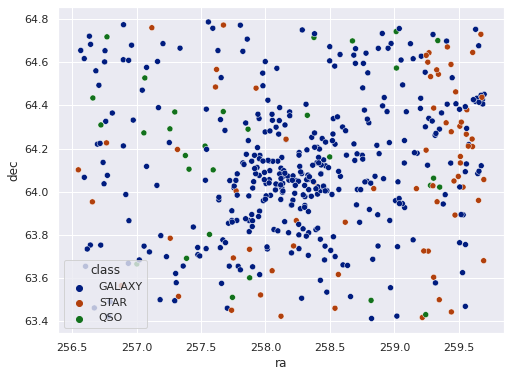

In [9]:
fig,ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=test,
                x="ra",y="dec",
                hue="class")
plt.show()

As the table and the histogram above shows, there are a lot of objects in our sample that aren't associated with the structure, and the structure might show up better if we were to isolate only the cluster galaxies. What we can do is redo our query, but this time restrict the redshift range and the object type.
What should the redshift range be? We can find out by making a plot only around the cluster peak.

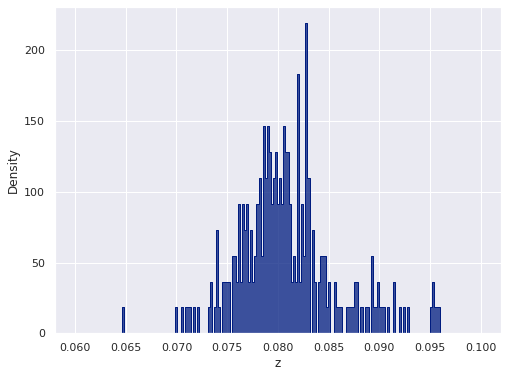

In [10]:
# first make some bins that encompass the range
bins = np.linspace(0.06,0.1,200,endpoint=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(data=test,
             x="z",
             bins=bins,
             stat="density",
             element="step")
plt.show()

# Machine Learning: Neural Network

The previous query returned a subset of the full data. There are 8 features and 1 classifier. 

    X = z,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z
    y = class

where class = galaxy, QSO, star.

A neural network can be trained to determine the classification based on the given features. 

Expand the query search and then convert classes from strings to integer labels.

In [11]:
query = (
    """
    SELECT z,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,class
        FROM specPhoto
    WHERE (ra BETWEEN 200 AND 300) AND 
          (dec BETWEEN 63.4 and 64.8)
    """
)

test = CasJobs.executeQuery(query,"dr16")
print(test.shape)
test.head(5)

(6523, 9)


,z,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,class
0,0.000010,277.61413,64.792012,16.33645,15.28708,15.06910,15.00701,15.02738,STAR
1,-0.000544,277.67082,64.629417,16.94332,15.50342,14.92497,14.68519,14.57316,STAR
2,-0.000212,277.87271,64.563003,16.21088,16.38353,16.89942,17.24982,17.53777,STAR
3,-0.000458,277.82355,64.749550,17.11062,16.13788,15.96873,15.91311,15.95269,STAR
4,-0.000720,277.51232,64.706455,18.25936,17.33069,17.08629,16.94284,16.91855,STAR


In [12]:
# relevant machine learning modules
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
import pandas as pd
from sklearn import (linear_model,pipeline,model_selection,preprocessing,
                    tree,ensemble,svm,decomposition,multioutput,metrics,
                    feature_selection,neural_network,cluster)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Extract classes from data frame and convert them to integers.
# add new column of classifier indicies to dummy  dataframe df
"""
# this way throws an error setcopywarning
classes = test['class'].unique()
df = test.copy(deep=True)
df['class_idx'] = df['class']
for (i,c) in enumerate(classes):
    l = (df['class'] == c)
    df['class_idx'][l] = i

# This way works
df = test.copy(deep=True)
df[['class_idx']]  = df[['class']].apply(lambda x: pd.factorize(x)[0] )
"""
# using sklearn to do the conversion 
df = test.copy(deep=True)
le = preprocessing.LabelEncoder()
df['class_idx'] = le.fit_transform(df['class'])

In [14]:
df.head(16)

,z,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,class,class_idx
0,0.000010,277.61413,64.792012,16.33645,15.28708,15.06910,15.00701,15.02738,STAR,2
1,-0.000544,277.67082,64.629417,16.94332,15.50342,14.92497,14.68519,14.57316,STAR,2
2,-0.000212,277.87271,64.563003,16.21088,16.38353,16.89942,17.24982,17.53777,STAR,2
3,-0.000458,277.82355,64.749550,17.11062,16.13788,15.96873,15.91311,15.95269,STAR,2
4,-0.000720,277.51232,64.706455,18.25936,17.33069,17.08629,16.94284,16.91855,STAR,2
5,-0.000135,277.76621,64.797106,19.15401,17.61396,17.12860,16.94875,16.86462,STAR,2
6,-0.000302,277.86307,64.578286,14.67912,14.98340,15.51418,15.87435,16.19737,STAR,2
7,-0.000221,277.53618,64.739115,17.64710,16.56980,16.29330,16.17790,16.14691,STAR,2
8,-0.001138,277.61670,64.740598,18.49893,17.30098,17.21230,17.13532,17.11097,STAR,2
9,0.000036,277.52620,64.441905,16.05492,14.95917,14.70630,14.62613,14.63064,STAR,2


In [15]:
# separate data frame into features and classifiers
X = df.drop(columns=['class','class_idx']).values
y = df['class_idx'].values

In [16]:
# split test set
Xtrain, Xtest, ytrain,ytest = model_selection.train_test_split(X,y)
# grid search to find optimal paramters of neural network 
parameters = {'nn__alpha':[0.0001,0.001,0.01],
              'nn__hidden_layer_sizes':[[10],[10,10],[10,10,10],
                                        [25],[25,25],[25,25,25]]
}
# build pipeline with feature scaling and Ridge linear regression
pipe = pipeline.Pipeline([
                          ('std',preprocessing.StandardScaler()),
                          ('nn',neural_network.MLPClassifier())
])
f1_scorer = metrics.make_scorer(metrics.f1_score,average='micro')
model = model_selection.GridSearchCV(pipe,
                                     parameters,
                                     refit=True,
                                     return_train_score=True,
                                     #scoring='f1_micro',
                                     scoring=f1_scorer,
                                     n_jobs=-1)
model.fit(Xtrain,ytrain)
# prediction training set and test set 
ptrain = model.predict(Xtrain)
ptest = model.predict(Xtest)

err_train = metrics.mean_squared_error(ytrain,ptrain)
print("-> RMSE of training set = %g with score = %g"%(err_train**0.5,model.score(Xtrain,ytrain)))

err_test = metrics.mean_squared_error(ytest,ptest)
print("-> RMSE = %g of test set with score = %g"%(err_test**0.5,model.score(Xtest,ytest)))

print('\nbest parameters from cross validsation: ',model.best_params_)
print('best score from cross validation: ',model.best_score_)

ptest = model.predict(Xtest)
f1 = metrics.f1_score(ytest,ptest,average=None)
print("\nF1-scores: ",f1)
print("F1-mean: ",np.mean(f1))

-> RMSE of training set = 0.152654 with score = 0.987735
-> RMSE = 0.19497 of test set with score = 0.98038

best parameters from cross validsation:  {'nn__alpha': 0.01, 'nn__hidden_layer_sizes': [25, 25]}
best score from cross validation:  0.9818071108827295

F1-scores:  [0.98233618 0.94444444 0.99009901]
F1-mean:  0.9722932122272057


/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


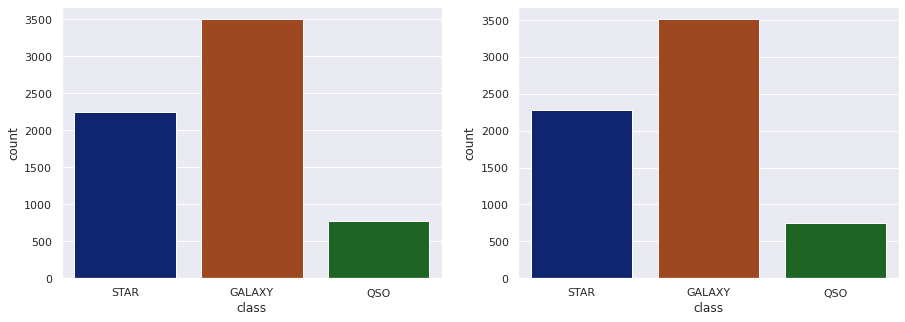

In [17]:
pfull = model.predict(X)
pfull = le.inverse_transform(pfull)
fig,ax = plt.subplots(1,2,
                      figsize=(15,5))
sns.countplot(data=df,
              x="class",
              ax=ax[0])
sns.countplot(x=pfull,
              ax=ax[1])
ax[1].set(xlabel='class')
plt.show()

-> RMSE of training set = 0 with score = 1
-> RMSE = 0.193392 of test set with score = 0.982833

best parameters from cross validsation:  {'rf__n_estimators': 99}
best score from cross validation:  0.9795578310157478

F1-scores:  [0.98377752 0.95367847 0.99059025]
F1-mean:  0.9760154141559397


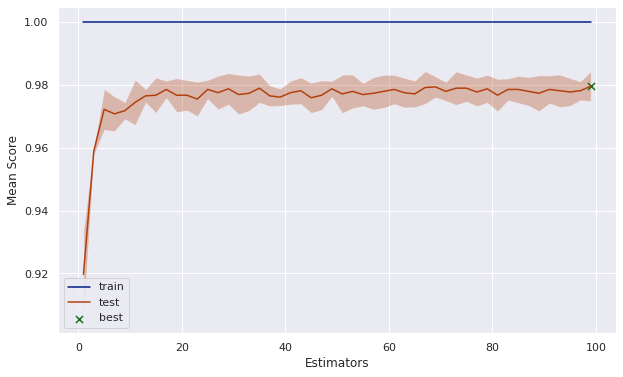

In [18]:
# split test set
Xtrain, Xtest, ytrain,ytest = model_selection.train_test_split(X,y)
# grid search to find optimal paramters of neural network 
parameters = {'rf__n_estimators':range(1,100,2)}
# build pipeline with feature scaling and Ridge linear regression
pipe = pipeline.Pipeline([
                          ('std',preprocessing.StandardScaler()),
                          ('rf',ensemble.ExtraTreesClassifier())
])
f1_scorer = metrics.make_scorer(metrics.f1_score,average='micro')
model = model_selection.GridSearchCV(pipe,
                                     parameters,
                                     refit=True,
                                     return_train_score=True,
                                     #scoring='f1_micro',
                                     scoring=f1_scorer,
                                     n_jobs=-1)
model.fit(Xtrain,ytrain)
# prediction training set and test set 
ptrain = model.predict(Xtrain)
ptest = model.predict(Xtest)

err_train = metrics.mean_squared_error(ytrain,ptrain)
print("-> RMSE of training set = %g with score = %g"%(err_train**0.5,model.score(Xtrain,ytrain)))

err_test = metrics.mean_squared_error(ytest,ptest)
print("-> RMSE = %g of test set with score = %g"%(err_test**0.5,model.score(Xtest,ytest)))

print('\nbest parameters from cross validsation: ',model.best_params_)
print('best score from cross validation: ',model.best_score_)

ptest = model.predict(Xtest)
f1 = metrics.f1_score(ytest,ptest,average=None)
print("\nF1-scores: ",f1)
print("F1-mean: ",np.mean(f1))

results = model.cv_results_
labels = ['train','test']
std = [results["std_%s_score"%split] for split in labels]
mean = [results["mean_%s_score"%split] for split in labels]

x = np.array(results["param_rf__n_estimators"].data,dtype=float)
idx = model.best_index_
fig,ax = plt.subplots(figsize=(10,6))
for (m,s,l) in zip(mean,std,labels):
    ax.plot(x,m,label=l)
    ax.fill_between(x,m-s,m+s,alpha=0.3)
ax.scatter(x[idx],m[idx],s=50,marker="x",label="best")
ax.set(xlabel='Estimators',ylabel='Mean Score')
plt.legend()
plt.show()

# Machine Learning: Support Vector Machine

In [19]:
# separate data frame into features and classifiers
X = df.drop(columns=['class','class_idx']).values
y = df['class_idx'].values

In [20]:
# split test set
Xtrain, Xtest, ytrain,ytest = model_selection.train_test_split(X,y)
parameters = {'svm__C':np.logspace(0,3,10,endpoint=True),
              'svm__gamma':['auto','scale'],
              'svm__kernel':['rbf','sigmoid']}
# build pipeline with feature scaling and Ridge linear regression
pipe = pipeline.Pipeline([
                          ('std',preprocessing.StandardScaler()),
                          ('svm',svm.SVC())
])
model = model_selection.GridSearchCV(pipe,
                                     parameters,
                                     refit=True,
                                     return_train_score=True,
                                     scoring='f1_micro',
                                     n_jobs=-1)
model.fit(Xtrain,ytrain)
# prediction training set and test set 
ptrain = model.predict(Xtrain)
ptest = model.predict(Xtest)

err_train = metrics.mean_squared_error(ytrain,ptrain)
print("-> RMSE of training set = %g with score = %g"%(err_train**0.5,model.score(Xtrain,ytrain)))

err_test = metrics.mean_squared_error(ytest,ptest)
print("-> RMSE = %g of test set with score = %g"%(err_test**0.5,model.score(Xtest,ytest)))

print('\nbest parameters from cross validsation: ',model.best_params_)
print('best score from cross validation: ',model.best_score_)

ptest = model.predict(Xtest)
f1 = metrics.f1_score(ytest,ptest,labels=None,average=None)
print("\nF1-scores: ",f1)
print("F1-mean: ",np.mean(f1))

-> RMSE of training set = 0.147893 with score = 0.990392
-> RMSE = 0.21156 of test set with score = 0.984672

best parameters from cross validsation:  {'svm__C': 215.44346900318823, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
best score from cross validation:  0.9783322993497391

F1-scores:  [0.98607242 0.97560976 0.98542805]
F1-mean:  0.9823700768325704


# TensorFlow/Keras

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
# using dummies to create output instead of 0,1,2 as the classifiers
X = test.drop(columns=['class']).values
y = pd.get_dummies(test[['class']],prefix='output')
y.head()


,output_GALAXY,output_QSO,output_STAR
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
Xtrain, Xtest, ytrain,ytest = model_selection.train_test_split(X,y)
Xtrain.shape,ytrain.shape

((4892, 8), (4892, 3))

In [24]:
in_layer = keras.layers.Input(shape=(Xtrain.shape[1],))
d1 = keras.layers.Dense(25,activation='sigmoid')(in_layer)
d2 = keras.layers.Dense(25,activation='sigmoid')(d1)
d3 = keras.layers.Dense(25,activation='sigmoid')(d2)
out_layer = keras.layers.Dense(ytrain.shape[1],activation='softmax')(d3)

model = keras.models.Model(inputs=in_layer,outputs=out_layer)

std = preprocessing.StandardScaler().fit(Xtrain)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[keras.metrics.Precision(),keras.metrics.Recall()])
history = model.fit(std.transform(Xtrain),ytrain,
                    batch_size=2,
                    epochs=10,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=keras.callbacks.History())
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 25)                225       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

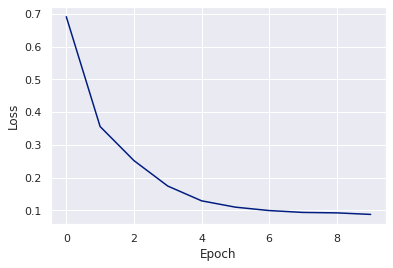

In [25]:
hist = pd.DataFrame(history.history)
hist.plot(y="loss",
          xlabel='Epoch',
          ylabel='Loss',
          legend=False)

In [26]:
# return loss and metric
scores = model.evaluate(std.transform(Xtest),ytest)
f1 = 2*scores[1]*scores[-1]/(scores[1] + scores[-1])
print("f1 = %.2f"%f1)

51/51 [==============================] - 0s 3ms/step - loss: 0.0857 - precision: 0.9840 - recall: 0.9834
f1 = 0.98


In [27]:
kwargs= dict(
             #kernel_regularizer=tf.keras.regularizers.L1(0.01),
             activity_regularizer=tf.keras.regularizers.L2(0.0001)
)

In [28]:
in_layer = keras.layers.Input(shape=(Xtrain.shape[1],))
d1 = keras.layers.Dense(25,activation='sigmoid')(in_layer)
d2 = keras.layers.Dense(25,activation='sigmoid',**kwargs)(d1)
d3 = keras.layers.Dense(25,activation='sigmoid',**kwargs)(d2)
out_layer = keras.layers.Dense(ytrain.shape[1],activation='softmax')(d3)

model = keras.models.Model(inputs=in_layer,outputs=out_layer)

std = preprocessing.StandardScaler().fit(Xtrain)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[keras.metrics.Precision(),keras.metrics.Recall()])
history = model.fit(std.transform(Xtrain),ytrain,
                    batch_size=2,
                    epochs=10,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=keras.callbacks.History())
# return loss and metric
scores = model.evaluate(std.transform(Xtest),ytest)
f1 = 2*scores[1]*scores[-1]/(scores[1] + scores[-1])
print("f1 = %.2f"%f1)

51/51 [==============================] - 0s 5ms/step - loss: 0.0766 - precision_1: 0.9810 - recall_1: 0.9804
f1 = 0.98
